In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [3]:
model=Sequential()

#### Convolution Layer

In [5]:
model.add(Convolution2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


#### Pooling Layer

In [6]:
model.add(MaxPooling2D(pool_size=(2,2)))

#### Flattening Layer

In [7]:
model.add(Flatten())

#### Full Connection Layer

In [8]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range = 0.1,zoom_range = 0.2,horizontal_flip = True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(64,64),batch_size=32,class_mode='binary')
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(64,64),batch_size=32,class_mode='binary')

Found 971 images belonging to 2 classes.
Found 324 images belonging to 2 classes.


In [17]:
history=model.fit_generator(training_set,samples_per_epoch=2000,nb_epoch=15,validation_data=test_set,nb_val_samples=200)

C:\Users\Dibs Gautam\Anaconda3\envs\tensoflow-sessions\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\Dibs Gautam\Anaconda3\envs\tensoflow-sessions\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=62, epochs=15, validation_steps=200)`
  """Entry point for launching an IPython kernel.


Epoch 1/15
62/62 [==============================] - 82s 1s/step - loss: 2.9208e-06 - acc: 1.0000 - val_loss: 2.6869e-06 - val_acc: 1.0000
Epoch 2/15
62/62 [==============================] - 78s 1s/step - loss: 3.3850e-06 - acc: 1.0000 - val_loss: 2.4860e-06 - val_acc: 1.0000
Epoch 3/15
62/62 [==============================] - 75s 1s/step - loss: 2.5462e-06 - acc: 1.0000 - val_loss: 2.0419e-06 - val_acc: 1.0000
Epoch 4/15
62/62 [==============================] - 76s 1s/step - loss: 2.1748e-06 - acc: 1.0000 - val_loss: 1.8991e-06 - val_acc: 1.0000
Epoch 5/15
62/62 [==============================] - 75s 1s/step - loss: 1.9261e-06 - acc: 1.0000 - val_loss: 1.6801e-06 - val_acc: 1.0000
Epoch 6/15
62/62 [==============================] - 76s 1s/step - loss: 2.3414e-06 - acc: 1.0000 - val_loss: 1.7409e-06 - val_acc: 1.0000
Epoch 7/15
62/62 [==============================] - 75s 1s/step - loss: 1.7591e-06 - acc: 1.0000 - val_loss: 1.4843e-06 - val_acc: 1.0000
Epoch 8/15
62/62 [================

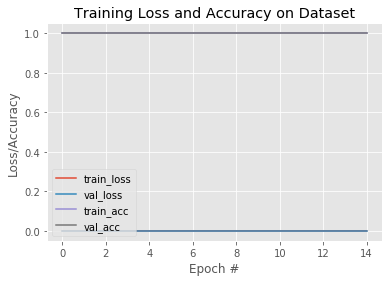

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
N = 15
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [21]:
history.history['acc']

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]